[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1X6WerwDVRWZ6xGltEvOPL8lT4ddlQc2M)


[![Open In nbviewer](https://jupyter.org/assets/main-logo.svg)](https://nbviewer.jupyter.org/github/hccho2/hccho2FirstGitProject/blob/master/torch_files/MNIST_loading.ipynb)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IRIS Dataset & Pandas

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" width=800 height=300 />

iris.csv
1. sepal(꽃받침) length in cm
2. sepal width in cm
3. petal(꽃잎) length in cm
4. petal width in cm
5. class:



150,4,setosa(0),versicolor(1),virginica(2)

6.4,2.8,5.6,2.2,2

5.0,2.3,3.3,1.0,1

4.9,2.5,4.5,1.7,2

4.9,3.1,1.5,0.1,0

5.7,3.8,1.7,0.3,0
<img src="https://bishwamittra.github.io/images/imli/iris_dataset.png" width=600 height=400 />

In [ ]:
url = "https://github.com/hccho2/hccho2FirstGitProject/raw/master/iris.csv"  # sklearn에서 다운받은 파일
data = pd.read_csv(url,header=None,skiprows=1,names=['feaure1','feaure2','feaure3','features4','label'])
print(data.shape)
data.head(5)

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
#data갯수 확인
#data.groupby('label').count()
data['label'].value_counts()

## iris Data 변형하기(map)

In [177]:
url = "https://github.com/hccho2/hccho2FirstGitProject/raw/master/iris2.csv"  # sklearn에서 다운받은 파일
data = pd.read_csv(url,header=None,skiprows=1,names=['feature1','feature2','feature3','feature4','label'])
data.head()

,feature1,feature2,feature3,feature4,label
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [178]:
data['label'] = data['label'].map({'Setosa': 0,'Versicolor': 1, 'Virginica': 2})

In [179]:
data.sample(5)

,feature1,feature2,feature3,feature4,label
10,5.4,3.7,1.5,0.2,0
54,6.5,2.8,4.6,1.5,1
95,5.7,3.0,4.2,1.2,1
56,6.3,3.3,4.7,1.6,1
132,6.4,2.8,5.6,2.2,2


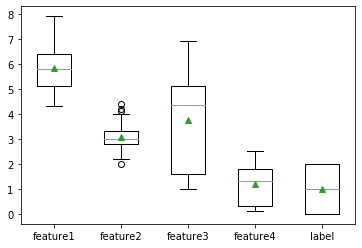

In [180]:
plt.boxplot(data.values,labels = data.columns,showmeans=True)  # data의 각각의 column(axis=1)마다 box plot이 그려진다.
plt.show()

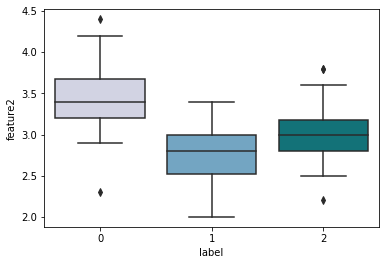

In [181]:
sns.boxplot(x='label',y='feature2',data = data, palette = 'PuBuGn');  # x로 넘어간 값에 따라, group 지어, y로 넘어간 값을 분석한다.

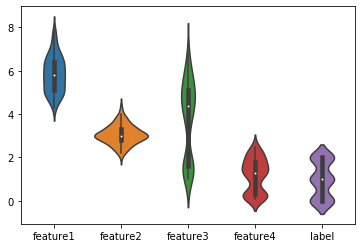

In [182]:
sns.violinplot(data=data)  # 각 feature 별로 plot

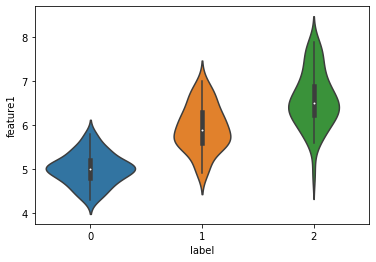

In [183]:
sns.violinplot(x='label',y='feature1', data=data)  # 하나의 feature를 지정. x값 별로 나누어서.

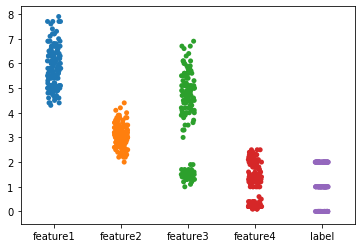

In [190]:
sns.stripplot(data=data)

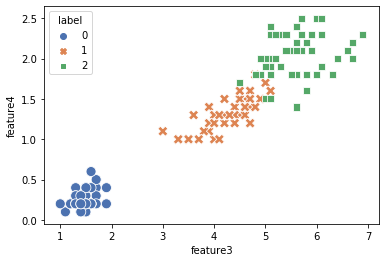

In [192]:
sns.scatterplot(x='feature3',y='feature4', hue='label', style='label', s=100, data=data,palette="deep")

C:\Anaconda3\envs\tf2\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


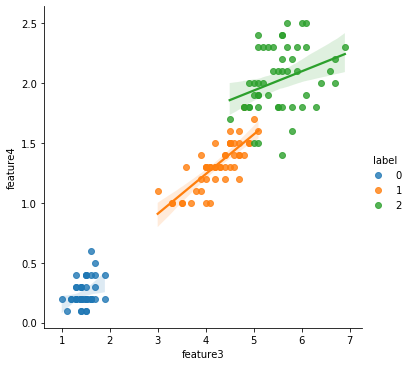

In [195]:
sns.lmplot(x='feature3',y='feature4', hue='label', data=data)

# PCA: Principal Component Analysis(주성분 분석)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import preprocessing
labels=['setosa','versicolor','virginica']
url = "https://github.com/hccho2/hccho2FirstGitProject/raw/master/iris.csv"  # sklearn에서 다운받은 파일
data = pd.read_csv(url,header=None,skiprows=1,names=['feaure1','feaure2','feaure3','features4','label'])

print(data.head(5))

y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels ---> pandas


#### NORMALIZE X ####
cols = X.columns
print("cols: ", cols)

stdand_scaler = preprocessing.StandardScaler()
X = stdand_scaler.fit_transform(X)  # 입력: dataframe ---> 출력: numpy array
print(X[:10])

In [ ]:
print(stdand_scaler.n_samples_seen_)
print("mean: ", stdand_scaler.mean_) # 평균
print('std: ', stdand_scaler.scale_ )  # 표준편차

In [ ]:
#### PCA 3 COMPONENTS ####
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)  # principal componet 추출
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])


# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

print(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))

fig = plt.figure(figsize = (8, 4))
ax = Axes3D(fig)


for grp_name, grp_idx in finalDf.groupby('label').groups.items():
    y = finalDf.iloc[grp_idx,1]
    x = finalDf.iloc[grp_idx,0]
    z = finalDf.iloc[grp_idx,2]
    ax.scatter(x,y,z, label=labels[grp_name])  # this way you can control color/marker/size of each group freely
ax.legend()
plt.title('PCA on IRIS', fontsize = 10)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 5);
ax.set_xlabel("Principal Component 1", fontsize = 7)
ax.set_ylabel("Principal Component 2", fontsize = 7)
ax.set_zlabel("Principal Component 3", fontsize = 7)

# simaple example(numpy array -> DataFrame)

In [ ]:
x1=np.array([ 1.4175,0.3390,0.2925,0.647,0.9069,0.4608,0.1069,-0.2201,-0.0138, -0.5808])
x2=np.array([ 0.1378,-0.0567,1.5304, 0.663,0.0663,-1.0959,0.9882,-0.6808,-0.120,-0.2618])
x3 =['A','B','A','C','C','A','A','B','C','B']
data=pd.DataFrame(data=list(zip(x1,x2,x3)),columns=['age','weight','label'])
data

In [ ]:
data.to_csv('xxx.csv',index=False)   # pd.read_csv

In [ ]:
data[data['label']=='A']  # data.loc[data['label']=='A']

In [ ]:
data.groupby('label').mean()

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = "age", y = "weight", data = data, hue = "label", alpha = 0.7, s = 50); # s=size

plt.title('PCA on data', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("age", fontsize = 15)
plt.ylabel("weight", fontsize = 15)
plt.show()

In [ ]:
data.values

In [ ]:
data['age'].values

In [ ]:
data.sort_values(['label'],ascending=[True]) # data가 바뀌지는 않는다.  inplace=True 해야 바뀐다.

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('precision', 3)

In [ ]:
data

In [ ]:
# count()
data.groupby('label').count()


In [ ]:
# column 1개인 경우.
# from collections import Counter    ---->   Counter(data['label'])  ---->  Counter({'A': 4, 'B': 3, 'C': 3})

data['label'].value_counts()

# IRIS Dataset From sklearn

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()  # dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
iris['data'].shape, iris['target'].shape

In [ ]:
iris['filename'], iris['target_names'], iris['feature_names']

In [ ]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [ ]:
data.head(10)

In [ ]:
data = data.sample(frac = 1) # shffle

In [ ]:
data.head(10)

In [ ]:
data.values[:,:3]

## Simple Deep Lerning Model with Tensorflow(IRIS)

In [8]:
from sklearn import datasets
import tensorflow as tf
import matplotlib.pyplot as plt
iris = datasets.load_iris()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),      
    tf.keras.layers.Dense(3, activation='softmax')
])
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)  # pytorch와 달리, 0.01 또는 0.001일 때, 잘된다. 0.0001이면 별로...
# tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)  ---> default: logit이 아니 확률
model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # sparse ---> target이 onthot이 아니어도 된다.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(iris['data'], iris['target'], batch_size=32, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3784 - accuracy: 0.2933
Epoch 2/200
5/5 [==============================] - 0s 1ms/step - loss: 1.3248 - accuracy: 0.2267
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2818 - accuracy: 0.1933
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2452 - accuracy: 0.2600
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2082 - accuracy: 0.3200
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 1.1783 - accuracy: 0.3333
Epoch 7/200
5/5 [==============================] - 0s 1ms/step - loss: 1.1550 - accuracy: 0.3333
Epoch 8/200
5/5 [==============================] - 0s 1ms/step - loss: 1.1344 - accuracy: 0.3333
Epoch 9/200
5/5 [==============================] - 0s 1ms/step - loss: 1.1143 - accuracy: 0.3333
Epoch 10/200
5/5 [==============================] - 0s 1ms/step - loss: 1.0979 - accuracy: 0.3867
Epoch 11/200
5/5 [===========

5/5 [==============================] - 0s 1ms/step - loss: 0.3872 - accuracy: 0.9533
Epoch 85/200
5/5 [==============================] - 0s 1ms/step - loss: 0.3817 - accuracy: 0.9533
Epoch 86/200
5/5 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.9600
Epoch 87/200
5/5 [==============================] - 0s 1ms/step - loss: 0.3722 - accuracy: 0.9600
Epoch 88/200
5/5 [==============================] - 0s 1ms/step - loss: 0.3662 - accuracy: 0.9733
Epoch 89/200
5/5 [==============================] - 0s 1ms/step - loss: 0.3609 - accuracy: 0.9600
Epoch 90/200
5/5 [==============================] - 0s 1ms/step - loss: 0.3567 - accuracy: 0.9533
Epoch 91/200
5/5 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.9600
Epoch 92/200
5/5 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.9600
Epoch 93/200
5/5 [==============================] - 0s 1ms/step - loss: 0.3421 - accuracy: 0.9600
Epoch 94/200
5/5 [===============

Epoch 167/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1408 - accuracy: 0.9800
Epoch 168/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1398 - accuracy: 0.9800
Epoch 169/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1393 - accuracy: 0.9800
Epoch 170/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1384 - accuracy: 0.9800
Epoch 171/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1368 - accuracy: 0.9733
Epoch 172/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1356 - accuracy: 0.9800
Epoch 173/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1347 - accuracy: 0.9800
Epoch 174/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1336 - accuracy: 0.9800
Epoch 175/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.9733
Epoch 176/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1313 - accuracy: 0.9733
Epoch 177/

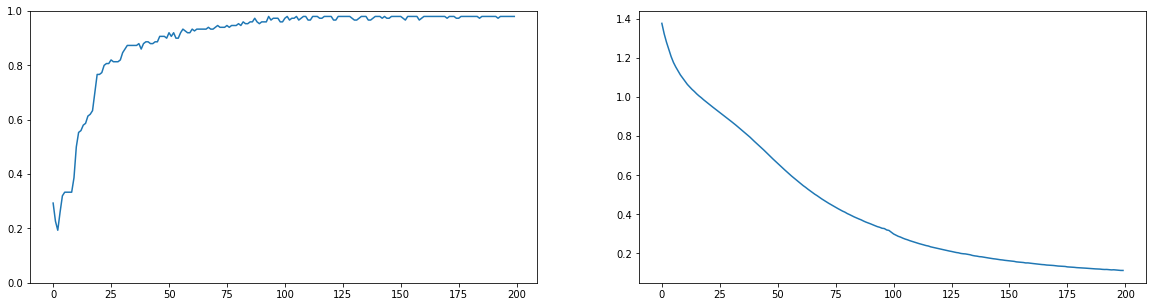

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train accuracy")
plt.ylim([0,1])
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train loss")

## Simple Deep Lerning Model with Pytorch(IRIS)
  * tensorflow 보다 learning rate에 더 민감하다.
  * weight 초기화는 효과가 없다.
  * learning rate을 낮게 하고, train 횟수를 늘이면, 수렴은 한다.

In [1]:
from sklearn import datasets
import torch
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
import tqdm
from sklearn import preprocessing
import matplotlib.pyplot as plt
iris = datasets.load_iris()   # dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
def weights_init(m):
    if type(m) == nn.Linear:
        #torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.normal_(m.weight, mean=0.0, std=0.1)
        torch.nn.init.zeros_(m.bias)  # m.bias.data.fill_(0.)  
    elif isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        torch.nn.init.zeros_(m.bias) 

model = nn.Sequential(nn.Linear(4,10),nn.ReLU(),nn.Linear(10,10),nn.ReLU(),nn.Linear(10,3))
#model.apply(weights_init)  # apply는 nn.Module로 부터 상속.

In [3]:
normal_flag = False

if normal_flag:
    stdand_scaler = preprocessing.StandardScaler()
    data_x = stdand_scaler.fit_transform(iris['data'])  # ---> numpy array
else:
    data_x = iris['data']

X = torch.tensor(data_x, dtype=torch.float32)
Y = torch.tensor(iris['target'],dtype=torch.long)
ds = TensorDataset(X,Y)  # tensor가 들어가야 한다.
loader = DataLoader(ds, batch_size=32, shuffle=True)
print(X.shape, Y.shape)

torch.Size([150, 4]) torch.Size([150])


In [4]:
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=3, bias=True)
)


In [5]:
loss_fn = nn.CrossEntropyLoss()  # 넘길 때, (N,C), (N,)  <--- logit & one_hot으로 변환하지 않는 target을 넘긴다.
optimizer = optim.Adam(model.parameters(),lr=0.001)   # tensorflow와 달리 lr=0.0001일 때, 잘된다.

In [6]:
n_epoch = 200

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)
history_loss = []
history_acc  = []
for epoch in range(n_epoch):
    model.train()
    running_loss = []
    acc = 0
    n = 0
    for i,(x,y) in enumerate(loader):
        optimizer.zero_grad()
        x = x.to(device)
        y = y.to(device)
        pred = model(x)
        loss = loss_fn(pred,y)
        loss.backward()
        optimizer.step()
        running_loss.append(loss.item())
        _,pred = pred.max(1)
        acc += (pred==y).float().sum().item()
        n += len(y)
    
    history_loss.append(np.mean(running_loss))
    history_acc.append(acc/n)
    if epoch%10==0:
        print('epoch: {}/{}, loss: {:.4f}, acc: {:.4f}'.format(epoch+1,n_epoch,history_loss[-1],history_acc[-1]))


cuda
epoch: 1/200, loss: 1.1742, acc: 0.2200
epoch: 11/200, loss: 1.0377, acc: 0.6333
epoch: 21/200, loss: 0.8455, acc: 0.6733
epoch: 31/200, loss: 0.6275, acc: 0.6867
epoch: 41/200, loss: 0.5090, acc: 0.7333
epoch: 51/200, loss: 0.4397, acc: 0.9067
epoch: 61/200, loss: 0.3825, acc: 0.9533
epoch: 71/200, loss: 0.3274, acc: 0.9667
epoch: 81/200, loss: 0.2715, acc: 0.9733
epoch: 91/200, loss: 0.2201, acc: 0.9667
epoch: 101/200, loss: 0.1875, acc: 0.9733
epoch: 111/200, loss: 0.1572, acc: 0.9733
epoch: 121/200, loss: 0.1391, acc: 0.9667
epoch: 131/200, loss: 0.1236, acc: 0.9733
epoch: 141/200, loss: 0.1140, acc: 0.9733
epoch: 151/200, loss: 0.1021, acc: 0.9733
epoch: 161/200, loss: 0.0958, acc: 0.9733
epoch: 171/200, loss: 0.1010, acc: 0.9733
epoch: 181/200, loss: 0.0879, acc: 0.9733
epoch: 191/200, loss: 0.0831, acc: 0.9733


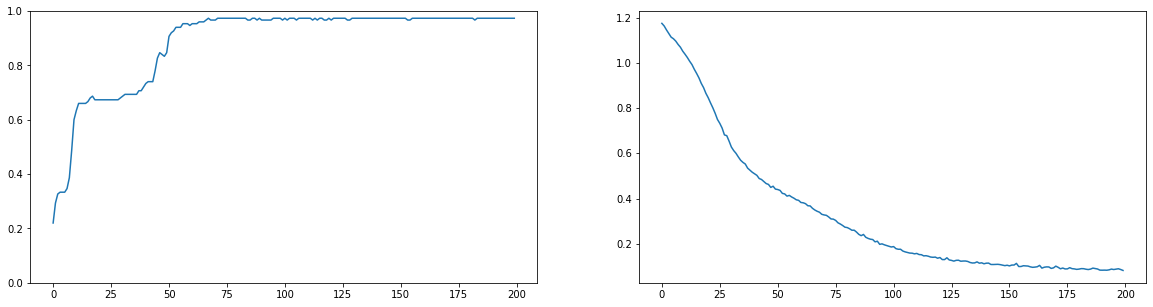

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history_acc, label="train accuracy")
plt.ylim([0,1])
plt.subplot(1,2,2)
plt.plot(history_loss, label="train loss")

In [ ]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
data.iloc[:,0]

In [ ]:
data

In [ ]:

data["ratio"] = data.iloc[:,0]/data.iloc[:,1]
data['index'] = data.index
#sns.lmplot(x="ID", y="ratio", data=iris, hue="species", fit_reg=False, legend=False)
#sns.lmplot(x='index',y="sepal length (cm)",data=data,hue='target')
sns.lmplot(x='index',y="ratio",data=data,hue='target')
plt.legend()
plt.show()

## Logitic Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import sys
import seaborn as sns
import pandas as pd
import tensorflow as tf

In [ ]:
url = 'https://github.com/hccho2/hccho2FirstGitProject/raw/master/mydata2.txt'
mydata = np.genfromtxt(url,delimiter=',',dtype=np.float32)
A = mydata[:,0:2]
B = mydata[:,-1].reshape(-1,1)  # mydata[:,2:3]
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.scatter(A[:, 0], A[:, 1], c=B[:,0],marker=">")
plt.subplot(1,2,2)
plt.scatter(A[:, 0], A[:, 1], c=B[:,0],marker="o")

#A = (A-np.mean(A,0))/np.std(A,0)

In [ ]:
df=pd.DataFrame(data=mydata,columns=['x','y','c'])
df.head(5)
print("data 갯수: ",len(df))

In [ ]:
# pandas dataframe을 넘겨주면 좋다.
sns.scatterplot(x='x', 
                y='y', 
                hue='c', # different colors by group
                style='c', # different shapes by group
                s=50, # marker size
                data=df)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(2,), activation='relu'),  
    tf.keras.layers.Dense(1, activation='sigmoid')
])
optimiser = tf.keras.optimizers.Adam(learning_rate=0.01)  # pytorch와 달리, 0.01 또는 0.001일 때, 잘된다. 0.0001이면 별로...
# tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)  ---> default: logit이 아니 확률
model.compile(optimizer=optimiser, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])  # sparse ---> target이 onthot이 아니어도 된다.
model.summary()

In [ ]:
# 모델의 output이 (N,1) 이므로, target도 (N,1)이 되어야 한다. target이 (N,)이면 안된다.

history = model.fit(A, B, batch_size=64, epochs=100)  # 출력: (N,1), target: (N,1)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train accuracy")
plt.ylim([0,1])
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train loss")

In [ ]:
df1=pd.DataFrame(data=mydata,columns=['x','y','target'])

prediction = (model.predict(A) > 0.5).astype(np.int)
  # np.concatenate([A,prediction],axis=-1)
df2=pd.DataFrame(data=np.c_[A,prediction],columns=['x','y','prediction'])
# pandas dataframe을 넘겨주어면 좋다.


plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x='x', 
                y='y', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=50, # marker size
                data=df1)
plt.title('data')


plt.subplot(1,2,2)
sns.scatterplot(x='x', 
                y='y', 
                hue='prediction', # different colors by group
                style='prediction', # different shapes by group
                s=50, # marker size
                data=df2)
plt.title('tf prediction')

## xgboost for iris dataset

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from xgboost import XGBClassifier, XGBRFClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris = datasets.load_iris()  # dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
labels=['setosa','versicolor','virginica']

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(iris['data'])
Y = [labels[y] for y in iris['target']]

x_train = pd.DataFrame(data= X,columns= iris['feature_names'] )
y_train = pd.Series(data= Y)
print(x_train.head(5))
print(y_train.head(5))

In [ ]:
xgb = XGBClassifier(n_estimators=150, learning_rate=0.05)
xgb.fit(x_train, y_train)

In [ ]:
pred = xgb.predict(x_train)
np.mean(pred==Y)

## xgboost for mydata

In [ ]:
url = 'https://github.com/hccho2/hccho2FirstGitProject/raw/master/mydata2.txt'
df = pd.read_csv(url, header=None,names=['x','y','label'])
df.head()

In [ ]:
X = df.loc[:, df.columns != 'label']
Y = df['label']  # Series

In [ ]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.05)
xgb.fit(X, Y)

In [ ]:
prediction = xgb.predict(X)
np.mean(prediction==Y)

In [ ]:
df_pred=pd.DataFrame(data=np.c_[X.values,Y.values, prediction],columns=['x','y','label','prediction'])
df_pred['misprediction']=df_pred['label'] != df_pred['prediction']
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x='x', 
                y='y', 
                hue='label', # different colors by group
                style='label', # different shapes by group
                s=50, # marker size
                data=df)
plt.title('data')


plt.subplot(1,2,2)
sns.scatterplot(x='x', 
                y='y', 
                hue='prediction', # different colors by group
                style='misprediction', # different shapes by group
                s=50, # marker size
                data=df_pred)
plt.title('xgboost prediction')

In [ ]:
df_pred[df_pred['label'] != df_pred['prediction']]

In [ ]:
df_pred

In [ ]:
prediction==Y

In [ ]:
zzz = sns.load_dataset("iris")

In [ ]:
zzz.index